In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
b_hhold_train = pd.read_csv("data/B_hhold_train.csv", index_col='id')

In [3]:
b_hhold_train.head()

,RzaXNcgd,LfWEhutI,jXOqJdNL,wJthinfa,PTLgvdlQ,ZvEApWrk,euTESpHe,bDVMMSYY,aSzMhjgD,ZehDbxxy,...,YVMuyCUV,AZVtosGB,toZzckhe,BkiXyuSp,ggucvVUs,VMvwrYds,VlNidRNP,rljjAmaN,ChbSWYhO,country
id,,,,,,,,,,,,,,,,,,,,,
57071,zTghO,pYfmQ,lNhMv,42,RQnVj,103,jpSeC,FDqwJ,rxJJI,IbWRL,...,nZcTi,pdvWY,LLuZj,qpzpO,kZRgh,VwGOP,DScEf,SKBnS,Enull,B
18973,zTghO,pYfmQ,lNhMv,34,iuxWN,-2,OLVWN,FDqwJ,ufugi,IbWRL,...,nZcTi,XrijK,LLuZj,qpzpO,kZRgh,VwGOP,JOdCB,SKBnS,Enull,B
20151,zTghO,pYfmQ,lNhMv,34,iuxWN,313,OMRWa,FDqwJ,rxJJI,IbWRL,...,nZcTi,FEjSW,lmjln,qpzpO,kZRgh,VwGOP,JOdCB,SKBnS,Enull,B
5730,zTghO,pYfmQ,lNhMv,58,iuxWN,138,jpSeC,FDqwJ,rxJJI,IbWRL,...,nZcTi,XrijK,lmjln,ZZzXr,kZRgh,VwGOP,ZwQQe,SKBnS,Enull,B
35033,zTghO,pYfmQ,lNhMv,122,iuxWN,68,OLVWN,FDqwJ,rxJJI,IbWRL,...,nZcTi,CRHYU,lmjln,qpzpO,kZRgh,VwGOP,WFgZH,SKBnS,Enull,B


In [4]:
b_hhold_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3255 entries, 57071 to 4923
Columns: 442 entries, RzaXNcgd to country
dtypes: bool(1), float64(9), int64(14), object(418)
memory usage: 11.0+ MB


In [5]:
b_hhold_train.select_dtypes(include=["float64", "int64"]).head()

,wJthinfa,ZvEApWrk,vuQrLzvK,FGWqGkmD,qrOrXLPM,BXOWgPgL,umkFMfvA,McFBIGsm,NjDdhqIe,rCVqiShm,...,IrxBnWxE,BRzuVmyf,dnlnKrAg,VyHofjLM,GrLBZowF,oszSdLhD,aAufyreG,cDhZjxaW,OSmfjCbE,IOMvIGQS
id,,,,,,,,,,,,,,,,,,,,,
57071,42,103,67,NaN,16,NaN,NaN,NaN,98,-18,...,NaN,15.0,-15927.0,2,-4,1,66.0,-59,NaN,100
18973,34,-2,92,NaN,16,NaN,NaN,NaN,-7,-38,...,NaN,21.0,NaN,2,-4,1,21.0,-59,NaN,75
20151,34,313,97,NaN,24,NaN,NaN,NaN,308,-10,...,NaN,66.0,NaN,2,-10,1,NaN,1,NaN,150
5730,58,138,-64,NaN,24,150.0,NaN,305.0,133,-48,...,NaN,36.0,NaN,2,-184,1,NaN,-59,-506.0,100
35033,122,68,-54,NaN,24,0.0,NaN,5.0,63,-28,...,NaN,15.0,NaN,2,-244,1,NaN,-39,-6.0,50


In [13]:
b_hhold_train["wJthinfa"].dtype

dtype('int64')

In [15]:
from pandas.api.types import is_numeric_dtype

In [16]:
def impute_vals(df):
    for column in df.columns:
        if(is_numeric_dtype(df[column])):
            df[column].fillna(df[column].mean(), inplace=True)
    
    return df

In [17]:
b_filled = impute_vals(b_hhold_train)

In [19]:
b_filled.select_dtypes(include=["float64", "int64"]).head()

,wJthinfa,ZvEApWrk,vuQrLzvK,FGWqGkmD,qrOrXLPM,BXOWgPgL,umkFMfvA,McFBIGsm,NjDdhqIe,rCVqiShm,...,IrxBnWxE,BRzuVmyf,dnlnKrAg,VyHofjLM,GrLBZowF,oszSdLhD,aAufyreG,cDhZjxaW,OSmfjCbE,IOMvIGQS
id,,,,,,,,,,,,,,,,,,,,,
57071,42,103,67,-7.509967,16,158.354633,-33.279775,301.10623,98,-18,...,0.647059,15.0,-15927.000000,2,-4,1,66.000000,-59,-339.568291,100
18973,34,-2,92,-7.509967,16,158.354633,-33.279775,301.10623,-7,-38,...,0.647059,21.0,-15965.135338,2,-4,1,21.000000,-59,-339.568291,75
20151,34,313,97,-7.509967,24,158.354633,-33.279775,301.10623,308,-10,...,0.647059,66.0,-15965.135338,2,-10,1,45.782178,1,-339.568291,150
5730,58,138,-64,-7.509967,24,150.000000,-33.279775,305.00000,133,-48,...,0.647059,36.0,-15965.135338,2,-184,1,45.782178,-59,-506.000000,100
35033,122,68,-54,-7.509967,24,0.000000,-33.279775,5.00000,63,-28,...,0.647059,15.0,-15965.135338,2,-244,1,45.782178,-39,-6.000000,50


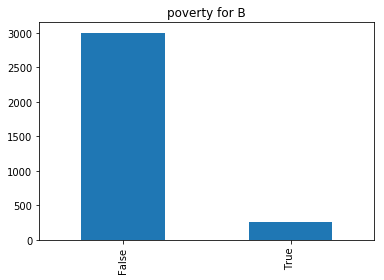

In [21]:
b_filled.poor.value_counts().plot.bar(title="poverty for B")

In [22]:
b_filled_Y = b_filled.poor

In [24]:
b_filled.drop('poor', axis=1, inplace=True)

In [26]:
b_filled_Y.head()

id
57071    False
18973    False
20151    False
5730     False
35033    False
Name: poor, dtype: bool

In [27]:
from imblearn.over_sampling import SMOTE

In [32]:
from preprocess_utils import stan, pre_process_data

In [33]:
b_filledX = pre_process_data(b_filled)

input shape	(3255, 441)
After standardization	(3255, 441)
After one hot encoding of categoricals	(3255, 1432)


In [34]:
bX_resampled, bY_resampled = SMOTE().fit_sample(b_filledX, b_filled_Y)

In [37]:
from collections import Counter

In [38]:
bX_resampled.shape

(6008, 1432)

In [39]:
print(Counter(bY_resampled).items())

dict_items([(False, 3004), (True, 3004)])


In [45]:
bY_resampled = bY_resampled.reshape(1, 6008)

In [46]:
bY_resampled.shape

(1, 6008)

In [47]:
b_filled.columns

Index(['RzaXNcgd', 'LfWEhutI', 'jXOqJdNL', 'wJthinfa', 'PTLgvdlQ', 'ZvEApWrk',
       'euTESpHe', 'bDVMMSYY', 'aSzMhjgD', 'ZehDbxxy',
       ...
       'YVMuyCUV', 'AZVtosGB', 'toZzckhe', 'BkiXyuSp', 'ggucvVUs', 'VMvwrYds',
       'VlNidRNP', 'rljjAmaN', 'ChbSWYhO', 'country'],
      dtype='object', length=441)